In [ ]:
from google.colab import files
uploaded = files.upload()


Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


In [ ]:
import pandas as pd

df = pd.read_csv("HR-Employee-Attrition.csv")  # Use the exact uploaded filename

# Basic info
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


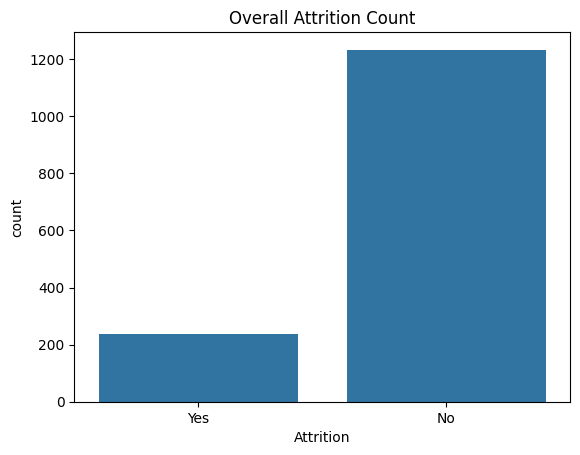

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition Count
sns.countplot(x='Attrition', data=df)
plt.title('Overall Attrition Count')
plt.show()


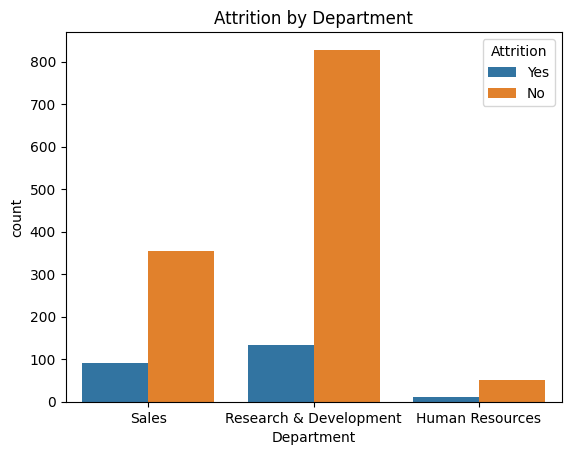

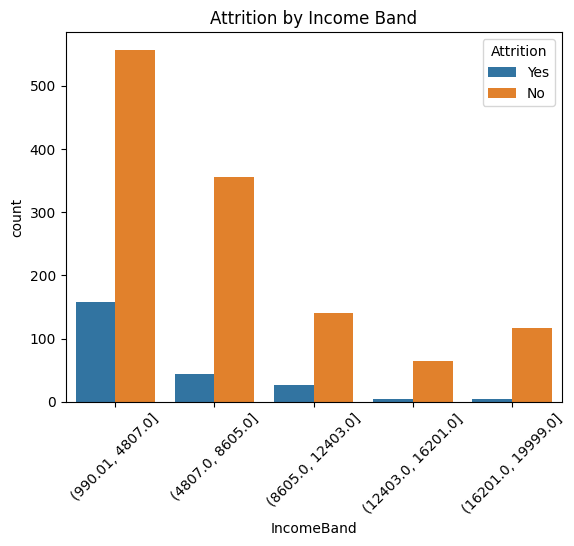

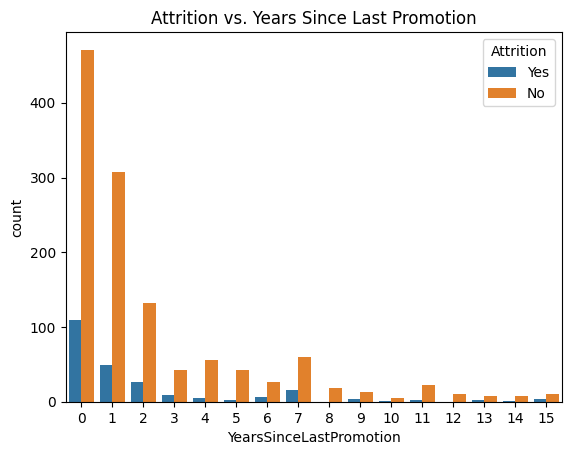

In [ ]:
# Attrition by Department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()

# Income Bands
df['IncomeBand'] = pd.cut(df['MonthlyIncome'], bins=5)
sns.countplot(x='IncomeBand', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Income Band')
plt.show()

# Promotion vs Attrition
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df)
plt.title('Attrition vs. Years Since Last Promotion')
plt.show()

In [ ]:
# Create a copy for modeling
df_model = df.copy()

# Drop the 'IncomeBand' column if it exists
if 'IncomeBand' in df_model.columns:
    df_model.drop('IncomeBand', axis=1, inplace=True)

# Label encode categorical features
le = LabelEncoder()
for col in df_model.select_dtypes(include='object'):
    df_model[col] = le.fit_transform(df_model[col])

# Split features and target
X = df_model.drop(['Attrition'], axis=1)
y = df_model['Attrition']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[219  36]
 [ 30   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.20      0.23      0.21        39

    accuracy                           0.78       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.78      0.78       294



In [ ]:
df['Attrition'].value_counts()


,count
Attrition,
No,1233
Yes,237


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# New shape after balancing
print(y_sm.value_counts())


Attrition
1    1233
0    1233
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[181  69]
 [ 38 206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       250
           1       0.75      0.84      0.79       244

    accuracy                           0.78       494
   macro avg       0.79      0.78      0.78       494
weighted avg       0.79      0.78      0.78       494



In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



In [ ]:
!pip install shap


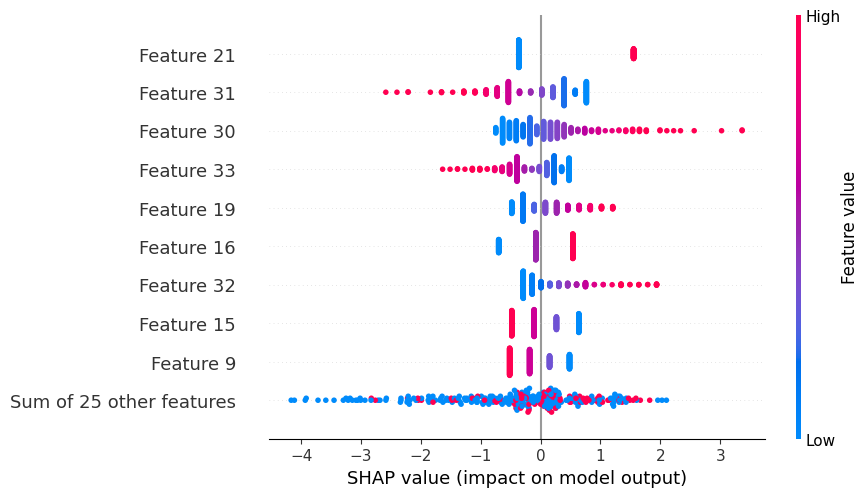

In [ ]:
import shap
import matplotlib.pyplot as plt

# For tree models, use TreeExplainer; for linear models, use LinearExplainer
explainer = shap.Explainer(log_model, X_train)
shap_values = explainer(X_test)

# Summary plot (feature importance)
shap.plots.beeswarm(shap_values)


In [ ]:
# Display SHAP value for a single prediction
shap.initjs()
shap.plots.force(shap_values[0])
